# Week 6 - Your 2nd ML Model: The Support Vector Machine


<hr style="border:2px solid gray">

# Outline <a id='outline'></a>
1. [Section One: The Support Vector Machine](#section-1)
1. [Section Two: A toy model with SVR](#section-2)
1. [Section Three: The California Housing dataset](#section-3)
1. [Section Four: Exercises](#section-4)


<hr style="border:2px solid gray">

<a name="section-1"></a>

## Section One: The Support Vector Machine [^](#outline)

<hr style="border:2px solid gray">

<a name="section-2"></a>

## Section Two: A toy model with SVR [^](#outline)

Now that you have seen the mathematics of the Support Vector Machine, we are going to try using this algorithm. Like we did for the k-Nearest Neighbours last week, we will try applying Support Vector Regression to so-called toy data. We can generate toy data for regression using the ```make_regression``` function from sklearn:

In [7]:
from sklearn.datasets import make_regression

X, y = make_regression(n_features = 1, n_informative = 1, noise = 15, random_state = 42)

This data is defined by a linear model, with Gaussian noise added to the output. Let us visualise this dataset:

Text(0, 0.5, 'y')

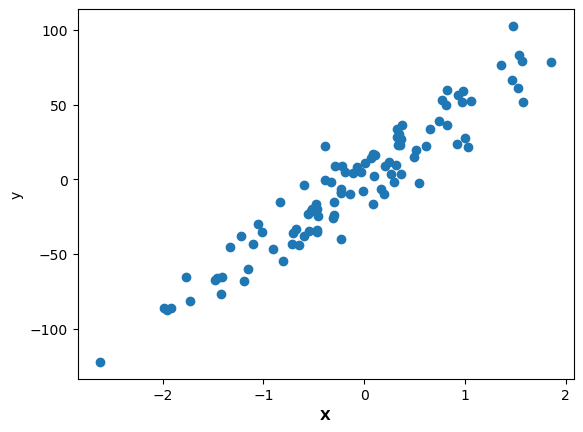

In [8]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.xlabel(r'$\mathbf{X}$')
plt.ylabel('y')

Clearly, this follows a linear trend, with some variation about a linear line. We should be able to fit this using a support vector machine. 

Just like last week, we need to separate our data into training and test data:

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

The syntax for SVR is similar to the syntax we have seen for other ML algorithms:

In [3]:
from sklearn.svm import SVR

toy_svr = SVR()

toy_svr.fit(X_train, y_train)

SVR()

To evaluate the performance of support vector regression, we need a new metric. A common choice to evaluate a general regression model is the **root-mean squared error (RMSE)**:

\begin{equation*}
\text{RMSE} = \sqrt{\frac{1}{N}\sum_{i = 1}^N (y_i - \hat{y}_i)^2},
\end{equation*}
where $y_i$ denotes the true value of $y$ for input $\mathbf{X}_i$, $\hat{y}_i$ denotes the SVR prediction for input $\mathbf{X}_i$, and N is the total number of test samples.

We can make a prediction on our test data, and then calculate the RMSE to see how good the model is. A smaller value is better.




In [31]:
y_pred = toy_svr.predict(X_test)

rmse = ((y_test - y_pred)**2).sum()/len(y_test)

print(rmse)


968.0724420009867


Much like for classification accuracy, sklearn implmenets the root-mean squared error in an easy function called ```mean_squared_error```. To calculate the root-mean squared error, we pass the argument ```squared = False```.

In [33]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred, squared = False)

31.11386253747655

Again, we want to measure the performance using the cross validation score. An important detail of ```cross_val_score``` in sklearn is that it implements a fixed set of scorers, or used the default scorer of the algorithm as implemented in sklearn. For SVR, this is a metric known as the **coefficient of determination** (which you will see next week [MAYBE]?), but for consistency we will continue to use the root-mean squared error. This requires manual definition of an RMSE scorer, which we then pass to ```cross_val_score```.

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

rmse_scorer = make_scorer(mean_squared_error, squared = False)

cross_val_score(toy_svr, X_train, y_train, scoring=rmse_scorer)

array([36.23607781, 44.79673933, 32.57856642, 23.04526245, 28.40085886])

<div style="background-color:#C2F5DD">


### Example

Now you have the steps to build, train and test an SVR model, try varying the hyperparameters and try to find the best results you can. Hyperparameters to try varying include:
* the regularisation parameter C
* epsilon, the scale wtihin which prediction errors are not penalised
* the kernel

There are others, take a look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html) to see what else you can vary. Make sure to record whatever you do vary!

Record your results and present the information.

<hr style="border:2px solid gray">

<a name="section-3"></a>

## Section Three: The California Housing dataset [^](#outline)

Now we have experimented with SVR on toy data, we will now introduce the dataset you will work with for the remainder of this week. We will work with another dataset that is built into sklearn, the California housing dataset. This datset is derived from the 1990 U.S. census, which comprises house prices grouped by block group (the smallest geographical unit used by the US Census Bureau, typically 600-3000 people) and 8 features for each sample. 

Further details can be found in the sklearn [User Guide](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). Much like the IRIS dataset you saw last week, it is easy to import:

In [36]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing()

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

<hr style="border:2px solid gray">

<a name="section-4"></a>

## Section Four: Exercises [^](#outline)